hello world world


[(1, 1), (2, 1), (3, 2), (2, 3), (1, 4), (2, 5), (3, 6), (4, 7), (5, 6), (6, 5), (7, 6), (8, 7), (9, 7), (10, 7), (11, 7), (12, 7), (13, 8), (14, 9), (15, 8), (15, 7), (15, 6), (16, 5), (17, 6), (18, 7), (19, 7), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 6), (26, 5), (25, 5), (24, 5), (23, 4), (24, 3), (25, 3), (26, 3), (27, 3), (28, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (29, 10), (29, 11), (29, 12), (29, 13), (29, 14), (29, 15), (29, 16), (29, 17), (29, 18), (28, 19), (27, 20), (27, 21), (27, 22), (27, 23), (27, 24), (27, 25), (27, 26), (27, 27), (27, 28), (28, 29), (29, 29)]


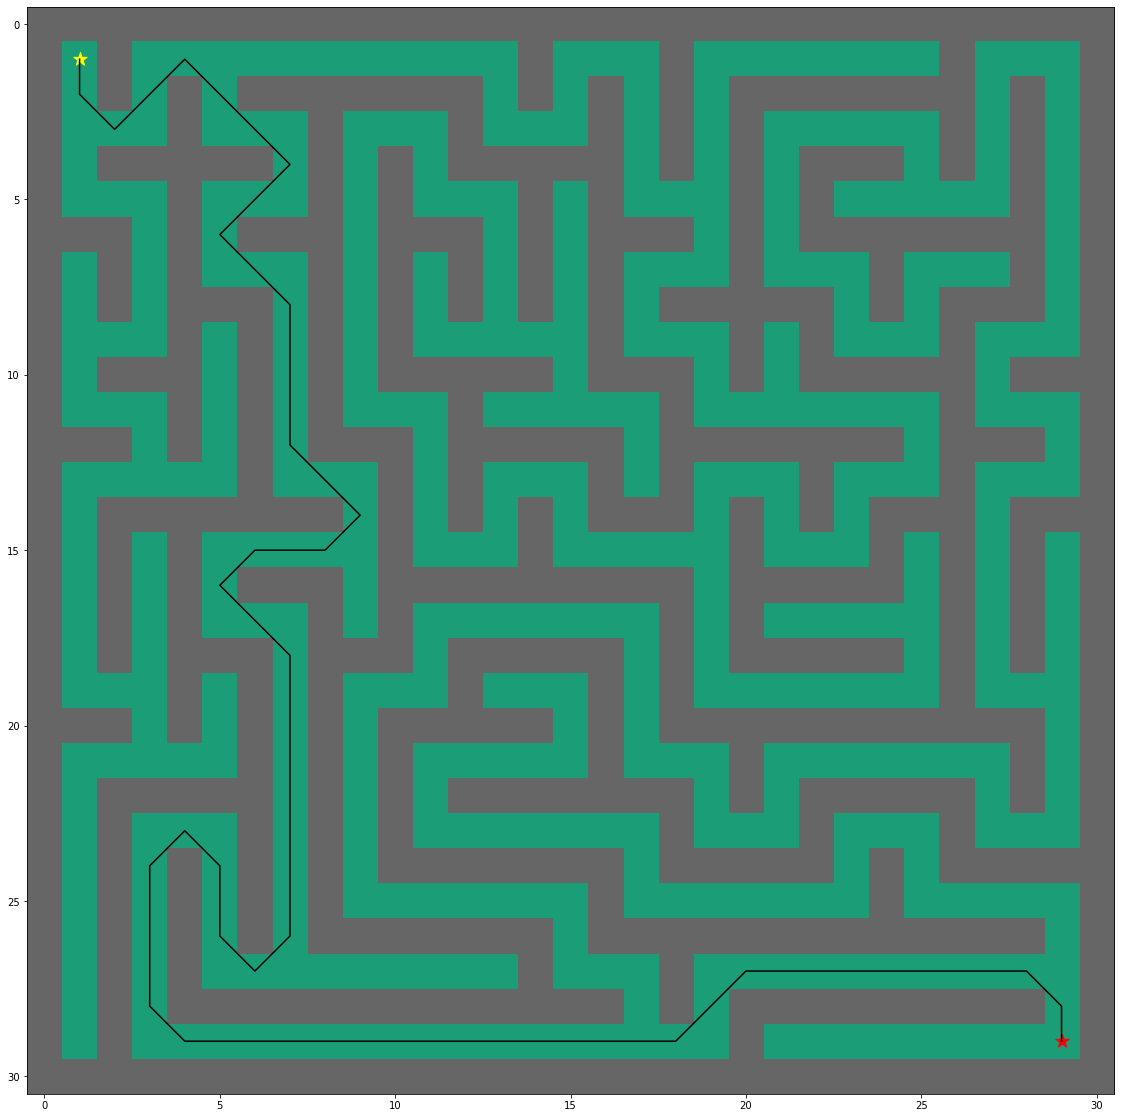

In [1]:
# import packages

##############################################################################



import numpy as np

import heapq

import matplotlib.pyplot as plt

from matplotlib.pyplot import figure



##############################################################################

# plot grid

##############################################################################




# start point and goal

from random import shuffle, randrange

def make_maze(w = 16, h = 8):
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)]
    ver = [["10"] * w + ['1'] for _ in range(h)] + [[]]
    hor = [["11"] * w + ['1'] for _ in range(h + 1)]

    def walk(x, y):
        vis[y][x] = 1

        d = [(x - 1, y), (x, y + 1), (x + 1, y), (x, y - 1)]
        shuffle(d)
        for (xx, yy) in d:
            if vis[yy][xx]: continue
            if xx == x: hor[max(y, yy)][x] = "10"
            if yy == y: ver[y][max(x, xx)] = "00"
            walk(xx, yy)

    walk(randrange(w), randrange(h))

    s = ""
    for (a, b) in zip(hor, ver):
        s += ''.join(a + ['\n'] + b + ['\n'])
        
    M=[]
    for line in s.split("\n"):
        if line!="":
            R=[]
            for e in line:
                R.append(int(e))
            M.append(R)
    return M

grid=np.array(make_maze(15,15))



start = (1,1)

goal = (29,29)


##############################################################################

# heuristic function for path scoring

##############################################################################



def heuristic(a, b):

    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)



##############################################################################

# path finding function

##############################################################################



def astar(array, start, goal):

    neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]

    close_set = set()

    came_from = {}

    gscore = {start:0}

    fscore = {start:heuristic(start, goal)}

    oheap = []

    heapq.heappush(oheap, (fscore[start], start))


    while oheap:

        current = heapq.heappop(oheap)[1]

        if current == goal:

            data = []

            while current in came_from:

                data.append(current)

                current = came_from[current]

            return data

        close_set.add(current)

        for i, j in neighbors:

            neighbor = current[0] + i, current[1] + j

            tentative_g_score = gscore[current] + heuristic(current, neighbor)

            if 0 <= neighbor[0] < array.shape[0]:

                if 0 <= neighbor[1] < array.shape[1]:                

                    if array[neighbor[0]][neighbor[1]] == 1:

                        continue

                else:

                    # array bound y walls

                    continue

            else:

                # array bound x walls

                continue


            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):

                continue


            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:

                came_from[neighbor] = current

                gscore[neighbor] = tentative_g_score

                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)

                heapq.heappush(oheap, (fscore[neighbor], neighbor))


    return False

route = astar(grid, start, goal)

route = route + [start]

route = route[::-1]

print(route)


##############################################################################

# plot the path

##############################################################################



#extract x and y coordinates from route list

x_coords = []

y_coords = []

for i in (range(0,len(route))):

    x = route[i][0]

    y = route[i][1]

    x_coords.append(x)

    y_coords.append(y)

# plot map and path

fig, ax = plt.subplots(figsize=(20,20))

ax.imshow(grid, cmap=plt.cm.Dark2)

ax.scatter(start[1],start[0], marker = "*", color = "yellow", s = 200)

ax.scatter(goal[1],goal[0], marker = "*", color = "red", s = 200)

ax.plot(y_coords,x_coords, color = "black")

plt.show()
